In [1]:
#Data Analysis 
import pyspark
import pandas as pd
import numpy as np


In [2]:
#Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Machine Learning

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
#Read data

df = pd.read_csv("ks-projects-201612.csv", encoding= 'cp1252', low_memory = False)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [5]:
#Strip out while spaces 
df.columns = [x.strip() for x in df.columns.tolist()]

#Check 'name' column, 'category' column, and 'ID' contain Null value

df[(df['name'].isnull()) | (df['category'].isnull()) | (df['ID'].isnull())]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
36671,1218074363,I am Rupert,NaN,Webseries,Film & Video,GBP,2014-05-16 22:25:57,2000,2014-03-27 21:25:57,5,failed,1,GB,8.26779725,NaN,NaN,NaN
41069,124438738,BlanketPals TM,NaN,Interactive Design,Design,USD,2015-03-25 20:51:48,9750,2015-02-23 21:51:48,10890.45,successful,107,US,10890.45,NaN,NaN,NaN
63544,1378236004,{string&&loop} Knitting Craft with Code,NaN,Apparel,Fashion,USD,2016-05-28 00:00:00,1800,2016-04-29 21:04:40,2308,successful,119,US,2308,NaN,NaN,NaN
96753,1574873938,American Pin-up Revisitedd,NaN,Art,Art,USD,2014-04-03 17:52:09,7500,2014-03-04 17:52:09,100,failed,1,US,100,NaN,NaN,NaN
142830,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29 15:04:00,200000,2012-01-01 12:35:31,100,failed,1,US,100,NaN,NaN,NaN,NaN
262901,634871725,NaN,Video Games,Games,GBP,2013-01-06 23:00:00,2000,2012-12-19 23:57:48,196,failed,12,GB,317.7284362,NaN,NaN,NaN,NaN
265251,648853978,NaN,Product Design,Design,USD,2016-07-18 05:01:47,2500,2016-06-18 05:01:47,0,suspended,0,US,0,NaN,NaN,NaN,NaN
269930,676846639,Uplift: The Wearable iPhone Case with Zipline&...,NaN,Design,Design,USD,2011-04-04 20:08:17,50000,2011-03-05 20:08:17,1665,canceled,10,US,1665,NaN,NaN,NaN
289847,796533179,NaN,Painting,Art,USD,2011-12-05 05:59:00,35000,2011-11-06 23:55:55,220,failed,5,US,220,NaN,NaN,NaN,NaN


In [6]:
#Drop all the rows that contain Null value
df = df.dropna(axis=0, subset=['ID', 'name', 'category'])

#Delete last four columns
df = df.iloc[:,:-4]

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [7]:
#Check 30 top main categories
m = df.main_category.value_counts().head(30)
print(m)

Film & Video        57678
Music               46744
Publishing          34233
Games               28007
Technology          26128
Art                 23973
Design              23870
Food                21229
Fashion             18398
Theater              9972
Photography          9680
Comics               8753
Crafts               7187
Journalism           4073
Dance                3375
Fiction                35
Product Design         29
Documentary            28
Nonfiction             27
Children's Books       18
Tabletop Games         14
Shorts                 13
Video Games            12
Mixed Media            11
Art Books              10
Apparel                 9
Narrative Film          8
Web                     8
Hip-Hop                 7
Indie Rock              7
Name: main_category, dtype: int64


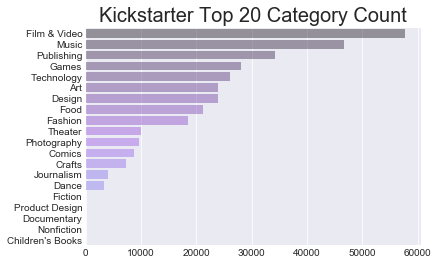

In [8]:
sns.set_style('darkgrid')

#pick top 20 instead
m = df.main_category.value_counts().head(20)

x = m.values
y = m.index

ax = sns.barplot(y=y, x=x, palette="cool_d", alpha=0.5)


plt.title('Kickstarter Top 20 Category Count', fontsize=20)
plt.show()

In [9]:
#chech currency used and rank by the frequency

In [10]:
c = df.currency.value_counts().head(5)

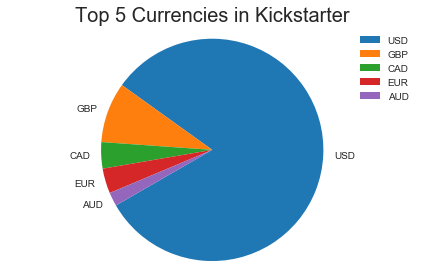

In [11]:
labels = c.index
sizes = c.values

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue']
explode = (0, 0, 0, 0, 0)  # explode 1st slice
 
plt.title('Top 5 Currencies in Kickstarter', fontsize=20)
patches, texts = plt.pie(sizes, labels = labels, startangle=210)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [12]:
#check countries that use kickstarter and rank them 

In [13]:
#Data cleaning
df[~df.country.str.contains('^[A-Z]{2}$', case=False)].country.value_counts()
replace = df[~df.country.str.contains('^[A-Z]{2}$', case=False)].country.unique().tolist()
df.loc[:,'country'] = df.country.replace(to_replace=replace, value='None')

In [14]:
m = df.country.value_counts().head(10)

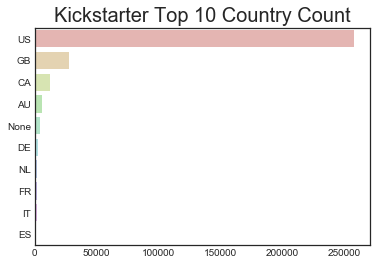

In [15]:
sns.set_style('white')

x = m.values
y = m.index

ax = sns.barplot(y=y, x=x, palette="hls", alpha=0.5)

plt.title('Kickstarter Top 10 Country Count', fontsize=20)
plt.show()

In [16]:
#Check the counts of projects with various successful status

In [17]:
m = df.state.value_counts().head(10)
print(df['state'].value_counts(dropna=True).head(6))

failed        168218
successful    113081
canceled       32354
live            4428
undefined       3555
suspended       1478
Name: state, dtype: int64


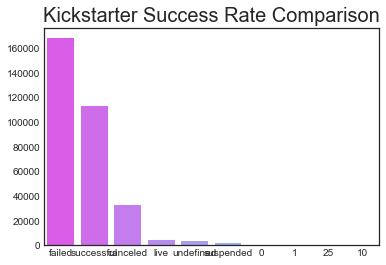

In [18]:
x = m.values
y = m.index
ax = sns.barplot(y=x, x=y, palette="cool_r", alpha=0.8)

plt.title('Kickstarter Success Rate Comparison', fontsize=20)
plt.show()

In [19]:
#plot relationship between two columns of scuess status and amount of USD pledged.


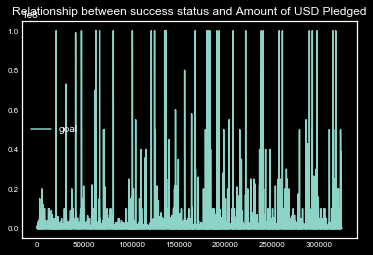

In [20]:
#Convert str to float
df['goal'] = pd.to_numeric(df.goal, downcast='float', errors='coerce')

import matplotlib.style as style
style.use('dark_background')
df[['state','goal']].plot(title = 'Relationship between success status and Amount of USD Pledged', fontsize= 8)

In [21]:
#According the graphs above, we can see the strong relations between the success rate of the goal
#and the amount of USD Pledged. We then will peform a linear regression model to obtain the baseline accuracy.

In [22]:
#Data Transformation

In [23]:
#Convert str to float
#df['goal'] = pd.to_numeric(df.goal, downcast='float', errors='coerce')
df.loc[:,'usd pledged'] = pd.to_numeric(df['usd pledged'], downcast='float', errors='coerce')

#Convert datetime
for col in ['launched', 'deadline']:
    df.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

#Drop all Null Values 
df = df.dropna()


df = df.rename(index=str, columns={'usd pledged': 'usd_pledged'})
df = df[df.usd_pledged > 0]

In [24]:
features = df.copy()

#Rename Column

features = features.rename(index=str, columns={'usd pledged': 'usd_pledged'})
print(features.columns)


Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged'],
      dtype='object')


In [25]:
#Features Extracting

features.drop(columns = ['launched'])
features['length_chars'] = features.name.str.len()
features['contains_title'] = pd.get_dummies(features.name.str.istitle(), drop_first=True)
features['US'] = np.where(features.country=='US', 1,0)
features['success'] = np.where(features.state == 'successful', 1, 0)
features['log_goal'] = np.log10(features.goal)
features['log_usd_pledged'] = np.log10(features.usd_pledged)
features['time_delta'] = (features.deadline.dt.date - features.launched.dt.date).dt.days

#Select specific columns

features = features.iloc[:,15:]

In [26]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
Y = features[('log_usd_pledged')]
X = features.drop(['log_usd_pledged', 'success'], axis=1)
regression.fit(X, Y)

print('Coefficients: \n', regression.coef_)
print('\nIntercept: \n', regression.intercept_)
print('\nR-squared: ')
print(regression.score(X, Y))

Coefficients: 
 [ 0.2419323   0.34431318 -0.00609185]

Intercept: 
 1.588777658311161

R-squared: 
0.055381299247773456


In [27]:
#As the amount predicted increases, the residual error also increases.

In [28]:
# Drop Log USD Pledged
features = features.drop(['log_usd_pledged'], 1)

#Set Traing and Testing data
X = features.drop(['success'], 1)
y = features.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [29]:
#PCA (Data reduction)

In [30]:
X_pca = features.drop('success', 1)
sklearn_pca = PCA(n_components=3)
sklearn_pca.fit_transform(X_pca)

print('PCA Variance Ratio: ', sklearn_pca.explained_variance_ratio_)
print('\nPCA Singular Values: ', sklearn_pca.singular_values_)

PCA Variance Ratio:  [9.95998925e-01 3.08939110e-03 9.11683883e-04]

PCA Singular Values:  [6607.48928947  367.99632226  199.90753847]


In [31]:
#Compare sucess rate

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


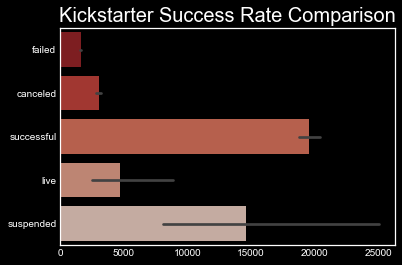

In [32]:
s_value = df['state'].values
u_value = df['usd_pledged'].values

ax = sns.barplot(y=s_value, x=u_value, palette="Reds_r", alpha=0.8)
sns.set_style('darkgrid')

plt.title('Kickstarter Success Rate Comparison', fontsize=20)
plt.show()

In [33]:
#Machine Learning Model 

In [34]:
#Random Forest

In [35]:
rf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=100)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

print('Random Forest Testing Accuracy: {:.4f}'.format(rf_score))

Random Forest Testing Accuracy: 0.6254


In [58]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rf, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[79527, 25305],
       [42796, 32510]])

In [36]:
#Cross validation import 
from sklearn.model_selection import cross_val_score

#3-fold CV for Random Forest
print("Random Forest 3-Fold CV score: ", cross_val_score(rf, X, y, cv=3))

Random Forest 3-Fold CV score:  [0.62387583 0.62506555 0.62315752]


In [37]:
list(zip(X_train.columns))

[('US',), ('log_goal',), ('time_delta',)]

In [38]:
list(zip(X_test.columns))

[('US',), ('log_goal',), ('time_delta',)]

In [39]:
#Machine Learning Model 2 Logistic Regression

In [40]:
lr = LogisticRegression(penalty='l2', solver='liblinear')
fit = lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

print('Logistic Regression Testing Accuracy: {:.4f}'.format(lr_score))


Logistic Regression Testing Accuracy: 0.6261


In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(lr, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[84991, 19841],
       [47502, 27804]])

In [41]:
#3-fold CV for Logistic Regression

print("Logistic Regression 3-Fold CV score: ", cross_val_score(lr, X, y, cv=3))

Logistic Regression 3-Fold CV score:  [0.62474616 0.62823445 0.62512134]


In [42]:
list(zip(X_train.columns))

[('US',), ('log_goal',), ('time_delta',)]

In [43]:
#Machine Learning Model 3 AdaBoost

In [44]:
#The SAMME.R algorithm achieving a lower test error with fewer boosting iterations.

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME.R",n_estimators=100)
ada.fit(X_train, y_train)
ada_score= ada.score(X_test, y_test)

print('AdaBoost Testing Accuracy: {:.4f}'.format(ada_score))


AdaBoost Testing Accuracy: 0.6391


In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(ada, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[80842, 23990],
       [41099, 34207]])

In [45]:
#3-fold CV for AdaBoost

print("Adaboost 3-Fold CV score: ", cross_val_score(ada, X, y, cv=3))

Adaboost 3-Fold CV score:  [0.63772288 0.640765   0.63755147]


In [46]:
#Machine Learning Model 4 KNN Clustering

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn.fit(X_train, y_train)
knn_score = (knn.score(X_test, y_test))

print('KNN-Clustering Testing Accuracy: {:.4f}'.format(knn_score))


KNN-Clustering Testing Accuracy: 0.6012


In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(knn, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[86006, 18826],
       [53075, 22231]])

In [48]:
#3-fold CV for KNN

print("KNN-Clustering 3-Fold CV score: ", cross_val_score(knn, X, y, cv=3))



KNN-Clustering 3-Fold CV score:  [0.60393653 0.5992234  0.59454815]


In [49]:
#Compare all the machine learning's accuracy

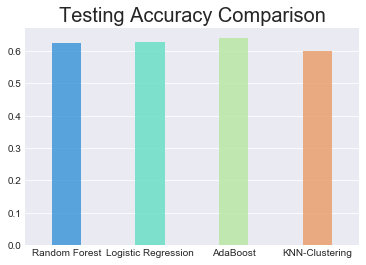

In [50]:
x = ['Random Forest', 'Logistic Regression', 'AdaBoost', 'KNN-Clustering']
y = [rf_score, lr_score, ada_score, knn_score]


ax = sns.barplot(y=y, x=x, palette="rainbow", alpha=0.8)
style.use('dark_background')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.title('Testing Accuracy Comparison', fontsize=20)
plt.show()